In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [60]:
sns.set(color_codes=True)

In [83]:
TRAIN = '/Users/yngtodd/src/kaggle/scene/data/csv/original/train.csv'
TEST = '/Users/yngtodd/src/kaggle/scene/data/csv/original/test.csv'

OUT_TRAIN = '/Users/yngtodd/src/kaggle/scene/data/textfiles/train.txt'
OUT_TEST = '/Users/yngtodd/src/kaggle/scene/data/textfiles/test.txt'

PROCESSED_TRAIN = '/Users/yngtodd/src/kaggle/scene/data/csv/processed/train.csv'
LABELS = '/Users/yngtodd/src/kaggle/scene/data/labels.npy'

In [32]:
def write_text(datapath, outpath):
    """Save text data to regular text file."""
    data = pd.read_csv(datapath)
    txt = data['text']
    txt.to_csv(outpath, sep=' ', index=False, header=False)

In [33]:
def load_data(datapath):
    return pd.read_csv(datapath)

In [75]:
def encode_labels(data):
    le = LabelEncoder()
    y_data = data['genre'].values
    labels = le.fit_transform(y_data)
    data['labels'] = labels
    vals, counts = np.unique(labels, return_counts=True)
    print(f'Labels: {vals}\nCounts: {counts}')
    return data

In [28]:
write_text(TRAIN, OUT_TRAIN)
write_text(TEST, OUT_TEST)

In [76]:
train = load_data(TRAIN)
test = load_data(TEST)

In [77]:
train = encode_labels(train)

Labels: [0 1 2 3 4 5 6 7 8]
Counts: [2392  147 2941 8873  456  270   63  613 6824]


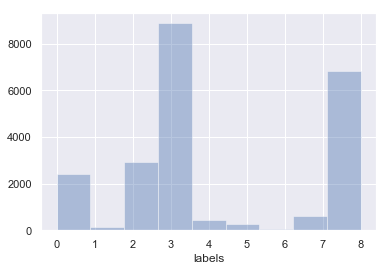

In [74]:
sns.distplot(train['labels'], bins=9, kde=False);

In [82]:
train.to_csv(PROCESSED_TRAIN, index=False)

In [84]:
labels = train['labels'].values
np.save(LABELS, labels)